## Importing Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import py21cmfast as p21c
from datetime import datetime
import logging, os
from numba import njit, jit

## Set logger to log caching activity

In [2]:
logger = logging.getLogger('21cmFAST')
logger.setLevel(logging.INFO)

## Version of 21cmFAST

In [3]:
print(f"Using 21cmFAST version {p21c.__version__}")

Using 21cmFAST version 3.0.0.dev5


## Number of cores running

In [4]:
print(f'Number of threads running = {os.cpu_count()}')

Number of threads running = 16


## Reset cache location 

In [5]:
p21c.config['direc'] = '/lustre/aoc/projects/hera/wchin/21cmFAST-cache'

## Cosmological Parameters (Default is used when no input is specified)

In [6]:
cosmo_params = p21c.CosmoParams()

## User Parameters, like box length, number of voxels (i.e. resolution) etc.

In [7]:
BOX_LEN=301  # 300, 301
HII_DIM=301  # 450, 301

user_params = p21c.UserParams(
    BOX_LEN=BOX_LEN,  # Box length in Mpc
    DIM=4*HII_DIM,      # Number of Voxels for hight resolution 
    HII_DIM=HII_DIM,  # Number of Voxels for low resolution 
    N_THREADS=os.cpu_count()
)

## Creating initial conditions box

In [8]:
start_time = datetime.now()
print(f'Excution qued at {start_time}')

init_cond = p21c.initial_conditions(
    cosmo_params=cosmo_params,
    user_params=user_params,
    direc='/lustre/aoc/projects/hera/wchin/21cmFAST-cache'
)

end_time = datetime.now()
execution_time = end_time - start_time
print(f'Execution completed at {end_time}')
print(f'Execution time = {execution_time}')

Excution qued at 2020-12-18 20:37:14.225739


2020-12-18 20:46:15,491 | INFO | Existing init_boxes found and read in (seed=230806296593).


Execution completed at 2020-12-18 20:46:16.267030
Execution time = 0:09:02.041291


## Vary: Rmax, EFF, constant: x_HI, z. x_HI error: 1e-2%

In [9]:
R_BUBBLE_MAXES = np.linspace(30, 0.225, 9)
HII_EFF_FACTORS = np.array(
    [19.04625, 
     19.511249999999997, 
     20.23875, 
     21.085, 
     22.655000000000012, 
     25.779375, 
     32.056640625, 
     56.6734375, 
     5291.5]
)
redshifts = np.array([6]*len(R_BUBBLE_MAXES))

## Generate ionized boxes and total neutral fractions as a function of redshift

In [10]:
# R_BUBBLE_MAXES = np.array(
#     [10, 20, 30]*3
# )
# HII_EFF_FACTORS = np.array(
#     [62.625, 42.042500000000004, 36.183125000000004,
#      47.1875, 34.390625, 31.25, 
#      37.96875, 29.53125, 27.6875]  
# )
# redshifts = np.array([7]*len(R_BUBBLE_MAXES))

progress_status = True



# sample_range = 10
# target_variable = 0.3  # x_HI neutral fraction
# target_error = 0.5  # percent
# error = 1  # intializing
# while abs(error) > target_variable*target_error/100:



ionized_boxes = np.zeros((len(redshifts), HII_DIM, HII_DIM, HII_DIM))
total_neutral_fractions = np.zeros(len(redshifts))

# print progress and local time
if progress_status:
    start_time = datetime.now()
    current_time = start_time
    print(f'Progress = 0%, localtime = {start_time}')

for i, z in enumerate(redshifts):
    ionized_boxes[i] = p21c.ionize_box(
        redshift=z, 
        init_boxes=init_cond,
        astro_params={
            'HII_EFF_FACTOR': HII_EFF_FACTORS[i],
            'R_BUBBLE_MAX': R_BUBBLE_MAXES[i]
        }
    ).xH_box
    total_neutral_fractions[i] = np.mean(ionized_boxes[i])

    # print progress and local time
    if progress_status:
        previous_time = current_time
        current_time = datetime.now()
        loop_time = current_time - previous_time
        elapsed_time = current_time - start_time
        print(f'progress = {int(round((i+1)*100/len(redshifts)))}%, \
localtime = {current_time}, loopexecuted in {loop_time}, elapsedtime = {elapsed_time}')
        
total_neutral_fractions



#     previous_error=error
#     error = target_variable - total_neutral_fractions[0]
    
#     print(f'HII_EFF_FACTOR={HII_EFF_FACTORS[0]}')
#     print(f'x_HI={total_neutral_fractions[0]}')
#     print(f'sample_range={sample_range}')
#     print(f'previous_error={previous_error}')
#     print(f'error={error}')
    
#     if error > 0:
#         HII_EFF_FACTORS[0] -= sample_range
#     else:
#         HII_EFF_FACTORS[0] += sample_range
        
#     if error*previous_error < 0:
#         sample_range -= 0.5*sample_range

Progress = 0%, localtime = 2020-12-18 20:46:18.584473


2020-12-18 20:46:21,513 | INFO | Existing z=6 ionized boxes found and read in (seed=230806296593).


progress = 11%, localtime = 2020-12-18 20:46:21.628437, loopexecuted in 0:00:03.043964, elapsedtime = 0:00:03.043964


2020-12-18 20:46:24,702 | INFO | Existing z=6 ionized boxes found and read in (seed=230806296593).


progress = 22%, localtime = 2020-12-18 20:46:24.805328, loopexecuted in 0:00:03.176891, elapsedtime = 0:00:06.220855


2020-12-18 20:46:26,449 | INFO | Existing z=6 ionized boxes found and read in (seed=230806296593).


progress = 33%, localtime = 2020-12-18 20:46:26.539184, loopexecuted in 0:00:01.733856, elapsedtime = 0:00:07.954711


2020-12-18 20:46:29,072 | INFO | Existing z=6 ionized boxes found and read in (seed=230806296593).


progress = 44%, localtime = 2020-12-18 20:46:29.150635, loopexecuted in 0:00:02.611451, elapsedtime = 0:00:10.566162


2020-12-18 20:46:30,867 | INFO | Existing z=6 ionized boxes found and read in (seed=230806296593).


progress = 56%, localtime = 2020-12-18 20:46:30.945652, loopexecuted in 0:00:01.795017, elapsedtime = 0:00:12.361179


2020-12-18 20:46:33,176 | INFO | Existing z=6 ionized boxes found and read in (seed=230806296593).


progress = 67%, localtime = 2020-12-18 20:46:33.258134, loopexecuted in 0:00:02.312482, elapsedtime = 0:00:14.673661


2020-12-18 20:46:35,647 | INFO | Existing z=6 ionized boxes found and read in (seed=230806296593).


progress = 78%, localtime = 2020-12-18 20:46:35.751199, loopexecuted in 0:00:02.493065, elapsedtime = 0:00:17.166726


2020-12-18 20:46:37,832 | INFO | Existing z=6 ionized boxes found and read in (seed=230806296593).


progress = 89%, localtime = 2020-12-18 20:46:37.933549, loopexecuted in 0:00:02.182350, elapsedtime = 0:00:19.349076


2020-12-18 20:46:40,581 | INFO | Existing z=6 ionized boxes found and read in (seed=230806296593).


progress = 100%, localtime = 2020-12-18 20:46:40.719844, loopexecuted in 0:00:02.786295, elapsedtime = 0:00:22.135371


array([0.19999881, 0.19998097, 0.20000417, 0.20001106, 0.19998624,
       0.20001978, 0.19999591, 0.19998911, 0.19998213])

## Generating Neutral Region Size Distributions with mfp()

In [11]:
def MFP_distributions(
    boxes=ionized_boxes, 
    bins = int(1e3),
    iterations=int(1e7)
):
    mfp_radii = np.zeros(bins)
    mfp_radii_probabilities = np.zeros((len(redshifts), bins))
    for i, box in enumerate(boxes):
        mfp_radii, mfp_radii_probabilities[i, :] = mfp(
            data=box,
            boxsize=BOX_LEN,
            iterations=iterations,
            verbose=True, 
# keep upper_lim true, original function was written for 
# ionized fraction boxes, i.e. val=1 => fully ionized
# we are operating on neutral fraction boxes, i.e. val=1 => fully neutral
# abstractly, upper_lim=True will measure the sizes of val=1 regions
            upper_lim=False,
            bins=bins, 
            r_min=None, 
            r_max=None
        )
    return mfp_radii, mfp_radii_probabilities## Calling function to generate neutral region size distributions with mfp()

## MFP alternate neutral region size measurement

In [13]:
from scipy import interpolate
def mfp(
    data, 
    xth=0.5, 
    boxsize=None, 
    iterations = 10000000, 
    verbose=True, 
    upper_lim=False, 
    bins=None, 
    r_min=None, 
    r_max=None
):
    """
    Determines the sizes using the Mean-Free-Path (MFP) approach.

    Parameters
    ----------
    input     : ndarray
        2D/3D array of ionization fraction/brightness temperature.
    xth       : float
        The threshold value (Default: 0.5).
    boxsize   : float
        The boxsize in cMpc can be given (Default: conv.LB).
    iterations: float
        Number of iterations (Default: 1e7).
    verbose   : bool
        It prints the progress of the program (Default: True).
    upper_lim : bool
        It decides if the threshold is the upper limit or the lower limit (Default: False).
    bins      : int
        Give number of bins or an array of sizes to re-bin into (Default: None).
    r_min     : float
        Minimum size after rebinning (Default: None).
    r_max     : float
        Maximum size after rebinning (Default: None).

    Returns
    -------
    r  : ndarray
        sizes of the regions
    dn : ndarray
        probability of finding the corresponding size 
    """
    if boxsize is None:
        boxsize = conv.LB
        print('Boxsize is set to %.2f Mpc.'%boxsize) 
    dim = len(data.shape)
    t1 = datetime.now()
    if (upper_lim): 
        data = -1.*data
        xth  = -1.*xth
    check_box = (data>=xth).sum()
    if check_box==0:
        data = np.ones(data.shape)
        iterations = 3
    if dim == 2:
        print("MFP method applied on 2D data (ver 1.0)")
        #out = mfp2d(data, xth, iterations=iterations, verbose=verbose)
        out = mfp2d(data, xth, iterations=iterations, verbose=verbose)
    elif dim == 3:
        print("MFP method applied on 3D data (ver 1.0)")
        #out = mfp3d(data, xth, iterations=iterations, verbose=verbose)
        out = mfp3d(data, xth, iterations=iterations, verbose=verbose)
    else:
        print("The data doesn't have the correct dimension")
        return 0
    nn = out[0]/iterations
    rr = out[1]
    t2 = datetime.now()
    runtime = (t2-t1).total_seconds()/60

    print("\nProgram runtime: %f minutes." %runtime)
    if check_box==0:
        print("There is no ROI in the data. Therefore, the BSD is zero everywhere.")
        return rr*boxsize/data.shape[0], np.zeros(rr.shape)
    print("The output contains a tuple with three values: r, rdP/dr")
    print("The curve has been normalized.")
  
    r0,p0 = rr*boxsize/data.shape[0], rr*nn #rr[nn.argmax()]*boxsize/data.shape[0]
    if bins is not None: r0,p0 = rebin_bsd(r0, p0, bins=bins, r_min=r_min, r_max=r_max)
    return r0, p0

def rebin_bsd(rr, pp, bins=10, r_min=None, r_max=None):
    fp = interpolate.interp1d(rr, pp, kind='cubic')
    if np.array(bins).size == 1:
        if r_min is None: r_min = rr.min()+1
        if r_max is None: r_max = rr.max()-10
        rs = 10**np.linspace(np.log10(r_min), np.log10(r_max), bins)
    else: rs = np.array(bins)
    return rs, fp(rs)


## MFP3D & 2D

In [15]:
from scipy.interpolate import RegularGridInterpolator
import sys

def mfp3d(arr, xth=0.5, iterations=10000000, verbose=True):
    #3D interpolation is required
    #RegularGridInterpolator in scipy(>0.14) is used to do the interpolation

    info = arr.shape  # dimentions of the data box

#=========================================================================================================
    longest = int(max(arr.shape)*np.sqrt(3))  
    # longest distance between 2 points in the box, i.e. diagonal corners
    # EDIT: switch the definition of longest to sqrt(3)*longest
#=========================================================================================================
    
    num_sz  = np.zeros(longest)  # place holder with length of the longest axis

    ar  = np.zeros(arr.shape)  # place holder with data box shape
    ar[arr >= xth] = 1  # generating a binary box, xth = threshold

    loc = np.argwhere(ar == 1)  # locations of ionized cells
    rand_loc = np.random.randint(0, high=loc.shape[0], size=iterations)  
    # iterations number of random ionized locations
 
    #==================================================================================
    thetas   = np.random.randint(0, 180, size=iterations)  # should it be 0 to 180 deg?
    # EDIT: switched upper limit from 360 to 180.
    #==================================================================================

    phis     = np.random.randint(0, 360, size=iterations)
    ls       = np.sin(thetas*np.pi/180)*np.cos(phis*np.pi/180)  # dx
    ms       = np.sin(thetas*np.pi/180)*np.sin(phis*np.pi/180)  # dy
    ns       = np.cos(thetas*np.pi/180)  # dz
    xs,ys,zs = loc[rand_loc,0],loc[rand_loc,1],loc[rand_loc,2]  
    # slicing ionized locations with [randome coordinate, (x,y,z)]

    interp_func = RegularGridInterpolator(
        (np.arange(info[0]), np.arange(info[1]), np.arange(info[2])), 
        ar, 
        bounds_error=False, 
        fill_value=0
    )

    #=========================================================================================================
    for rr in range(longest):  # steping 1 step along the ray for all directions.
    # should it be sqrt(longestX^2, longestY^2, longestZ^2)?
    # motivation: no rays will be longer than the longest axis?
    # EDIT: switch the definition of longest to sqrt(3)*longest
    #=========================================================================================================

        xs,ys,zs = xs+ls,ys+ms,zs+ns  # steping by dx, dy, dz
        pts    = np.vstack((xs,ys,zs)).T
        vals   = interp_func(pts)
        check  = np.argwhere(vals<=0.5)  # coordinates that are outsise ionized regions.
        num_sz[rr] = check.shape[0]  # record the number of new rays terminated in this loop
        xs,ys,zs = np.delete(xs, check),np.delete(ys, check),np.delete(zs, check)  # for the terminated rays,
        ls,ms,ns = np.delete(ls, check),np.delete(ms, check),np.delete(ns, check)  # delete the forward step 
        if verbose:
            perc = (rr+1)*100/longest
            msg  = '%.1f'%perc + '%'
            loading_verbose(msg)
        if not xs.size: break
    msg  = '100.0' + '%'
    loading_verbose(msg)
    size_px = np.arange(longest)
    return num_sz, size_px

def mfp2d(arr, xth=0.5, iterations=1000000, verbose=True):
    #2D interpolation is required
    #RegularGridInterpolator in scipy(>0.14) is used to do the interpolation

    info    = arr.shape
    longy	= max([info[0], info[1]])
    longest = int(np.sqrt(2)*longy)
    num_sz  = np.zeros(longest)

    ar  = np.zeros(arr.shape)
    ar[arr >= xth] = 1

    loc = np.argwhere(ar == 1)
    rand_loc = np.random.randint(0, high=loc.shape[0], size=iterations)
    thetas   = np.random.randint(0, 360, size=iterations)
    ls       = np.sin(thetas*np.pi/180)
    ms       = np.cos(thetas*np.pi/180)

    xs,ys    = loc[rand_loc,0],loc[rand_loc,1]

    interp_func = RegularGridInterpolator(
        (np.arange(info[0]), np.arange(info[1])), 
        ar, 
        bounds_error=False, 
        fill_value=0
    )

    for rr in range(longest):
        xs,ys  = xs+ls,ys+ms
        pts    = np.vstack((xs,ys)).T
        vals   = interp_func(pts)
        check  = np.argwhere(vals<=0.5)
        num_sz[rr] = check.shape[0]
        xs,ys  = np.delete(xs, check),np.delete(ys, check)
        ls,ms  = np.delete(ls, check),np.delete(ms, check)
        if verbose:
            perc = (rr+1)*100/longest
            msg  = '%.1f'%perc + '%'
            loading_verbose(msg)
        if not xs.size: break
    msg  = '100.0' + '%'
    loading_verbose(msg)
    size_px = np.arange(longest)
    return num_sz, size_px


def loading_verbose(string):
    msg = ("Completed: " + string )
    sys.stdout.write('\r'+msg)
    sys.stdout.flush()

## Calling function to generate neutral region size distributions with mfp()

In [16]:
bin_num_mfp = int(1e3)
iteration_mfp = int(1e8)
start_time = datetime.now()
print(f'Run started at {start_time}')
mfp_neutral_region_size, mfp_size_probabilities = MFP_distributions(
    boxes=ionized_boxes,
    bins=bin_num_mfp,
    iterations=iteration_mfp
)
end_time = datetime.now()
print(f'Run completed at {end_time}')
print(f'Total runtime: {end_time - start_time}')## Plotting mfp() distributions

Run started at 2020-12-18 20:51:51.791352
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%
Program runtime: 17.702392 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%
Program runtime: 15.363810 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%
Program runtime: 14.920974 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%
Program runtime: 14.446806 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%
Program runtime: 13.545549 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Complete

np.save('/lustre/aoc/projects/hera/wchin/mfp_neutral_region_size', mfp_neutral_region_size)
np.save('/lustre/aoc/projects/hera/wchin/mfp_size_probabilities', mfp_size_probabilities)

In [ ]:
mfp_neutral_region_size = np.load('/lustre/aoc/projects/hera/wchin/mfp_neutral_region_size')
mfp_size_probabilities = np.load('/lustre/aoc/projects/hera/wchin/mfp_size_probabilities')

## Plotting mfp() distributions

In [23]:
np.shape(mfp_neutral_region_size)

(1000,)

In [24]:
np.shape(mfp_size_probabilities)

(9, 1000)

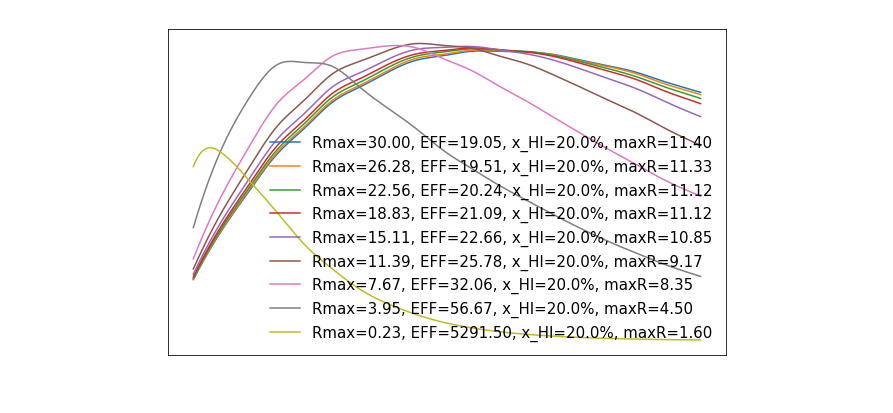

In [26]:
color='white'
percent=0.475

mfp_maxRs = np.zeros(len(mfp_size_probabilities))

plt.rcParams['figure.figsize'] = [10, 6]
for i, mfp_size_probability in enumerate(mfp_size_probabilities):
    
    mfp_maxRs[i] = mfp_neutral_region_size[np.argmax(mfp_size_probability)]
    
    plt.plot(
        mfp_neutral_region_size[:int(percent*bin_num_mfp)], 
        mfp_size_probability[:int(percent*bin_num_mfp)], 
        '-',
        label=f'Rmax={R_BUBBLE_MAXES[i]:.2f}, EFF={HII_EFF_FACTORS[i]:.2f}, \
x_HI={total_neutral_fractions[i]*100:.1f}%, \
maxR={mfp_maxRs[i]:.2f}'
    )
plt.legend(prop={'size': 15}, fancybox=True, framealpha=0)
plt.tick_params(color=color, labelcolor=color)
plt.xlabel('$R$ (Mpc)', color=color)
plt.ylabel('$R\mathrm{d}P/\mathrm{d}R$', color=color)
plt.title(f'Our Boxes, MFP method: Vary: Rmax, EFF, constant: x_HI, z={redshifts[0]} ({iteration_mfp:.0e} iterations)', color=color)
plt.rcParams['font.size'] = 18
# plt.yscale('log')

In [1]:
color='white'
percent=0.475

mfp_maxRs = np.zeros(len(mfp_size_probabilities[[0, 5, 6, 7]]))

# plt.rcParams['figure.figsize'] = [10, 6]
plt.figure(dpi=500)
for i, mfp_size_probability in enumerate(mfp_size_probabilities[[0, 5, 6, 7]]):
    
    mfp_maxRs[i] = mfp_neutral_region_size[np.argmax(mfp_size_probability)]
    
    plt.plot(
        mfp_neutral_region_size[:int(percent*bin_num_mfp)], 
        mfp_size_probability[:int(percent*bin_num_mfp)], 
        '-',
        label=f'Rmax={R_BUBBLE_MAXES[[0, 5, 6, 7]][i]:.2f}, EFF={HII_EFF_FACTORS[[0, 5, 6, 7]][i]:.2f}, radius={mfp_maxRs[i]:.2f}'
    )
plt.legend(prop={'size': 15}, fancybox=True, framealpha=0)
plt.tick_params(color=color, labelcolor=color)
plt.xlabel('$R$ (Mpc)', color=color)
plt.ylabel('$R\mathrm{d}P/\mathrm{d}R$', color=color)
plt.title(f'MFP method', color=color)
plt.rcParams['font.size'] = 18
# plt.yscale('log')

NameError: name 'np' is not defined